In [27]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.linear_model

In [28]:
data = np.loadtxt("notas_andes.dat")

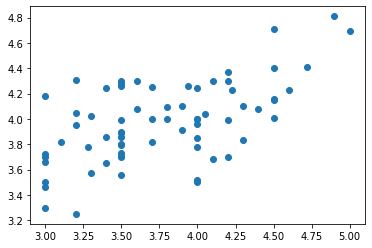

In [29]:
plt.scatter(data[:,0], data[:,4])

In [30]:
mean = np.mean(data[:,4])
print(mean)

3.9802898550724626


In [31]:
above_mean = data[:,4]>mean
below_mean = data[:,4]<=mean

In [36]:
Y = np.ones(len(data[:,4]), dtype=np.int)
Y[above_mean] = 1
Y[below_mean] = 0

In [37]:
X = data[:,:4]

In [54]:
classifier = sklearn.linear_model.LogisticRegression().fit(X, Y)

In [55]:
classifier.classes_

array([0, 1])

In [56]:
classifier.coef_

array([[1.03663178, 0.63895497, 0.81564445, 0.84610624]])

In [57]:
classifier.intercept_

array([-12.58027479])

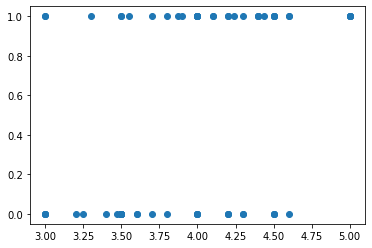

In [58]:
plt.scatter(X[:,3], Y)

In [59]:
Y_predict = classifier.predict(X)

In [60]:
Y_predict

array([1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 0])

In [61]:
import sklearn.metrics 

0.7058823529411765

In [66]:
sklearn.metrics.precision_score(Y, Y_predict, pos_label=0) #la fraccion de lo que clasifique como por debajo de la media, que esta efectivamente por debajo

0.6666666666666666

In [67]:
sklearn.metrics.precision_score(Y, Y_predict, pos_label=1) #la fraccion de lo que clasifique como por arriba de la media, que esta efectivamente por arriba

0.7575757575757576

In [68]:
sklearn.metrics.recall_score(Y, Y_predict, pos_label=0) #la fraccion de lo que se encuentra realmente por debajo de la media, que yo clasifique como por debajo de la media

0.75

In [69]:
sklearn.metrics.recall_score(Y, Y_predict, pos_label=1) #la fraccion de lo que se encuentra realmente por arriba de la media, que yo clasifique como por arriba de la media

0.6756756756756757

In [70]:
sklearn.metrics.f1_score(Y, Y_predict, pos_label=0)

0.7058823529411765

In [71]:
sklearn.metrics.f1_score(Y, Y_predict, pos_label=1)

0.7142857142857142

In [72]:
proba = classifier.predict_proba(X)

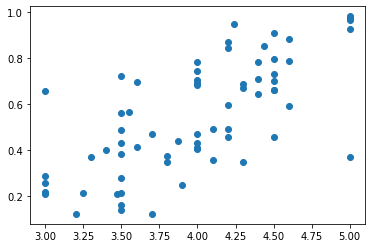

In [78]:
plt.scatter(X[:,3], proba[:,1]) # la probabilidad de alto promedio

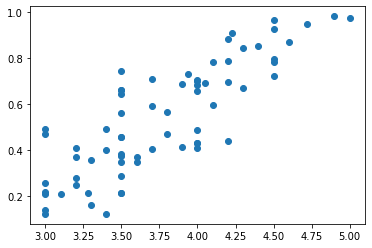

In [98]:
plt.scatter(X[:,0], proba[:,1]) # la probabilidad de alto promedio

In [93]:
n_probas = 100
probas_cut_alto = np.linspace(0.0,1.0,n_probas)
precision_probas = np.ones(n_probas)
recall_probas = np.ones(n_probas)
f1_probas = np.ones(n_probas)

for i in range(n_probas):
    ii = proba[:,1] > probas_cut_alto[i]
    Y_predict[ii] = 1
    Y_predict[~ii] = 0
    precision_probas[i] = sklearn.metrics.precision_score(Y, Y_predict, pos_label=1)
    recall_probas[i] = sklearn.metrics.recall_score(Y, Y_predict, pos_label=1)
    f1_probas[i] = sklearn.metrics.f1_score(Y, Y_predict, pos_label=1)

/Users/forero/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


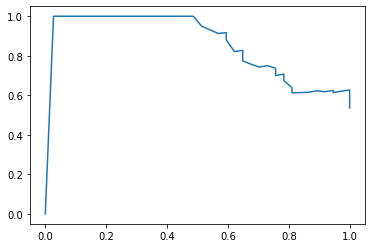

In [94]:
plt.plot(recall_probas, precision_probas)

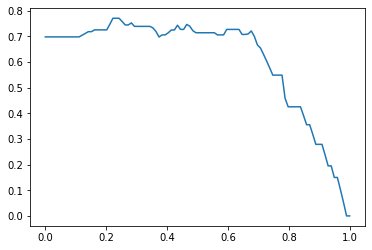

In [96]:
plt.plot(probas_cut_alto, f1_probas)